In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [2]:
# sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 

# sklearn evaluation
from  sklearn import metrics

# sklearn regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [4]:
test = pd.read_csv("test.csv")
test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


In [5]:
submission_df = pd.DataFrame()
submission_df["Customer_ID"] = test["Customer_ID"]

#### DATA DICTIONARY

* customer_ID - System-generated unique customerID
* months_as_customer - number of months a the insured as been a customer
* age - customer age
* insured_education_level - Most recent customers educational qualification
* insured_sex - gender
* insured_occupation - occupation of insured
* insured_hobbies - hobbies of insured
* insured_relationship - insured relationship
* capital-gains - capital gain
* capital-loss - capital-loss
* policy_number - policy_number
* policy_bind_date - policy blind insurance coverage
* policy_state -policy_state
* policy_csl - policy_csl
* policy_deductable -policy_deductable
* incident_location - incident_location
* incident_hour_of_the_day - incident_hour_of_the_day?
* number_of_vehicles_involved -number_of_vehicles_involved
* property_damage - property_damage
* bodily_injuries - bodily_injuries
* policy_annual_premium - policy_annual_premium
* umbrella_limit - umbrella_limit
* insured_zip -insured_zip
* incident_date - incident_date
* incident_type - incident_type
* collision_type - collision_type
* incident_severity - incident_severity
* authorities_contacted - authorities_contacted
* incident_state -incident_state
* incident_city - incident_city
* witnesses - witnesses
* police_report_available - police_report_available
* auto_make - auto_make
* auto_model - auto_model
* auto_year -auto_year
* _c39 - _c39
* total_claim_amount - total_claim_amount

In [6]:
# train_df.profile_report()

In [7]:
train_df.columns

Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       '_c39', 'total_claim_amount'],
      dtype='object')

In [8]:
train_df["_c39"].isnull().sum()

700

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

## Exploratory Data Analysis

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

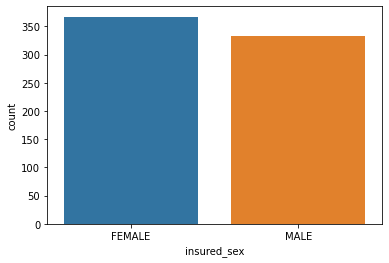

In [11]:
sns.countplot(x="insured_sex", data=train_df)

<AxesSubplot:xlabel='total_claim_amount'>

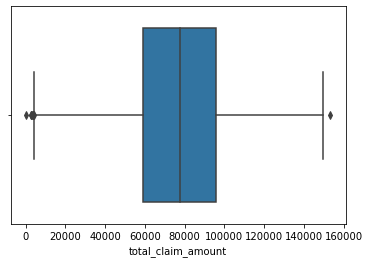

In [12]:
sns.boxplot(x="total_claim_amount", data=train_df)

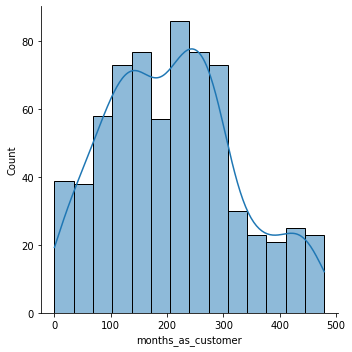

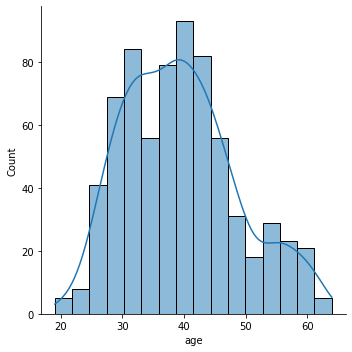

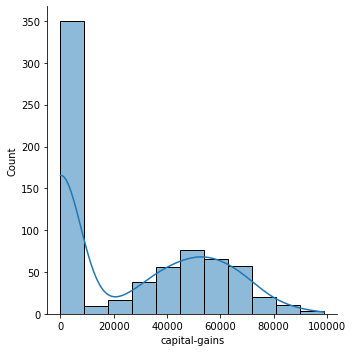

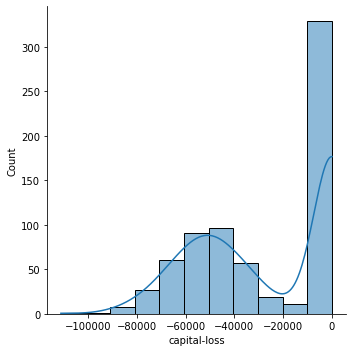

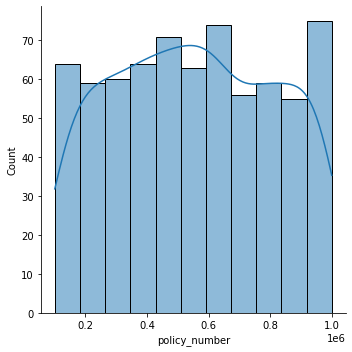

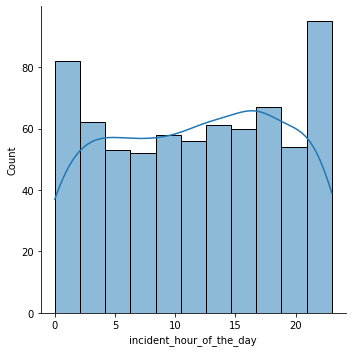

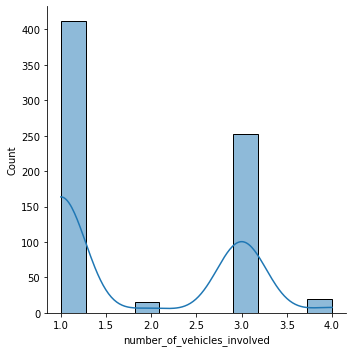

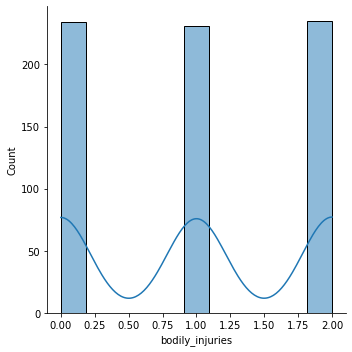

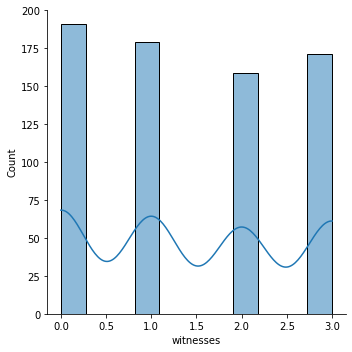

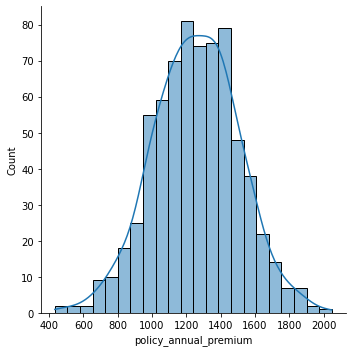

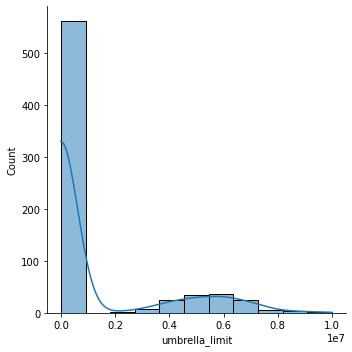

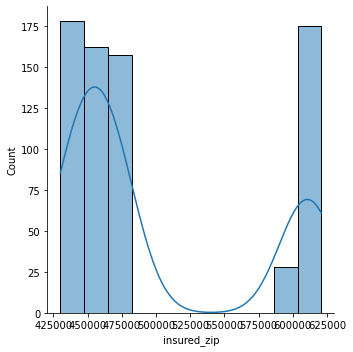

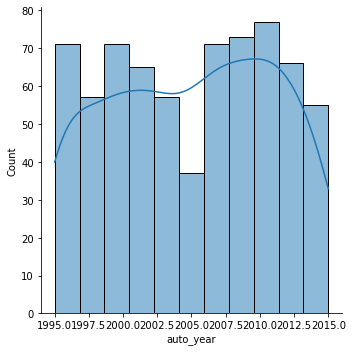

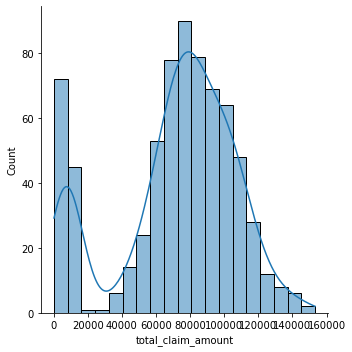

In [13]:
# use a for loop to plot each column from your dataframe
columns = ['months_as_customer', 'age', 'capital-gains', 'capital-loss',
       'policy_number', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
     'auto_year', 'total_claim_amount']
for column in columns:
    sns.displot(data= train_df, x= train_df[column], kde=True,)
    plt.show()

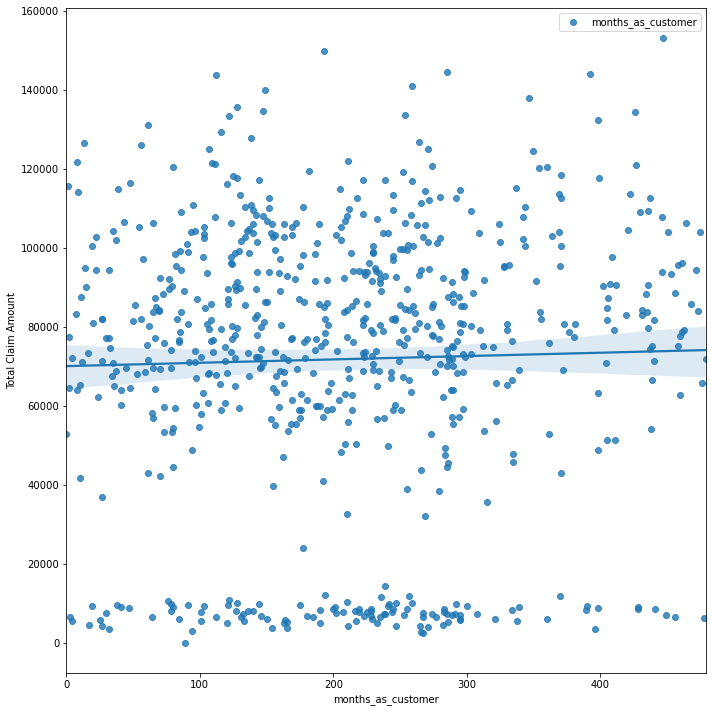

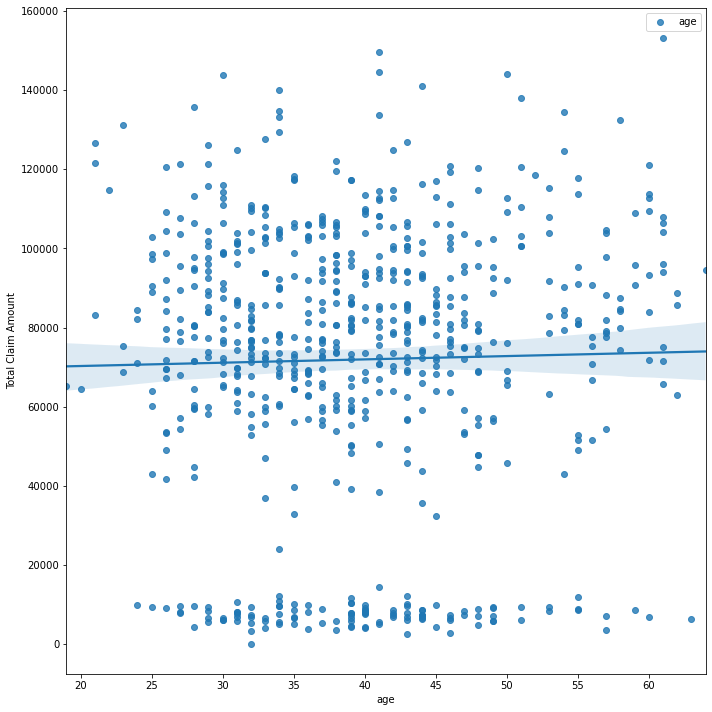

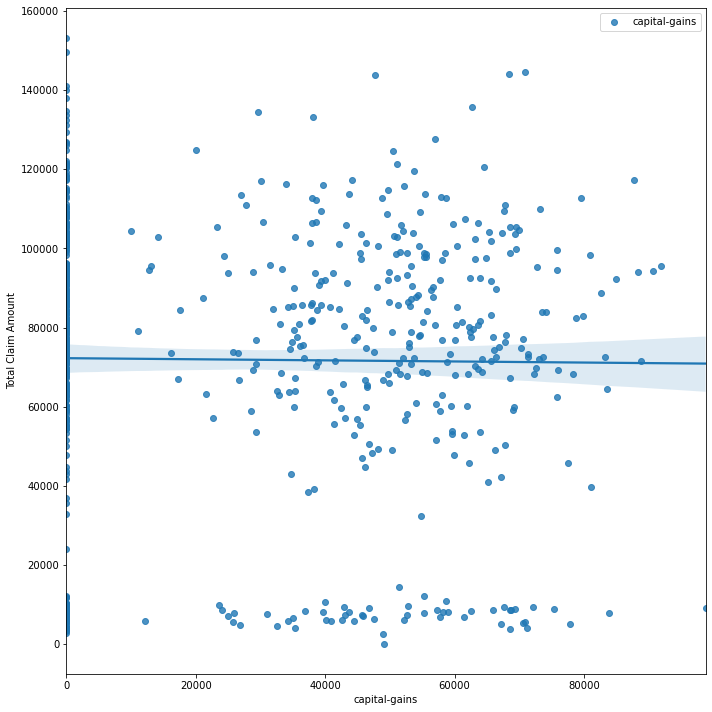

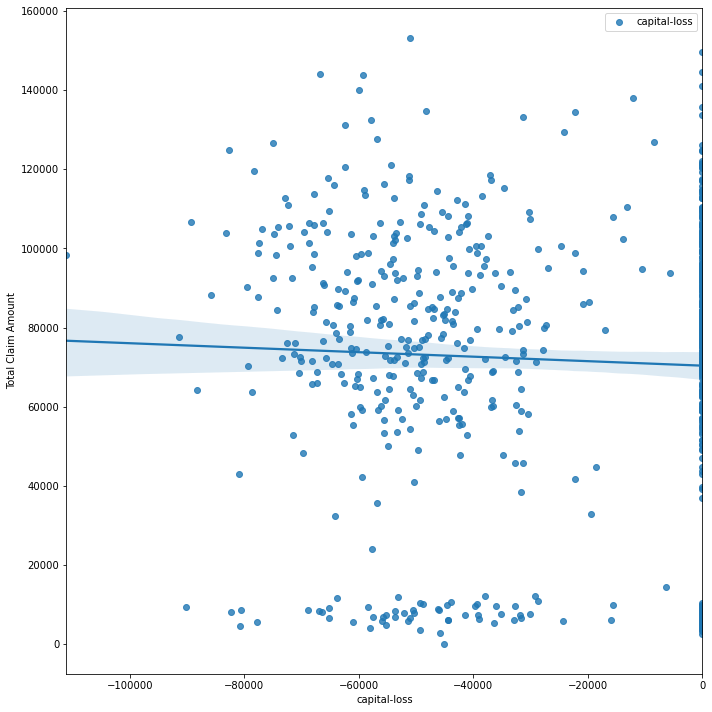

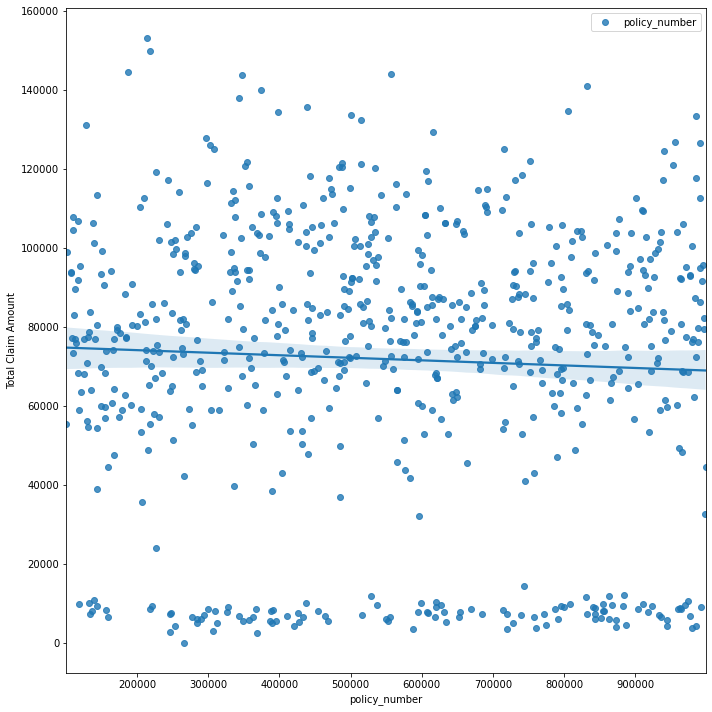

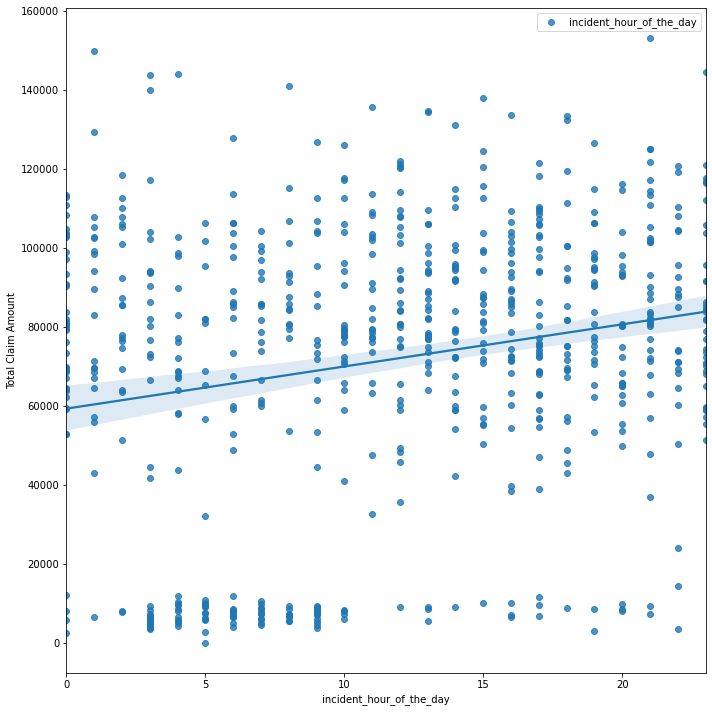

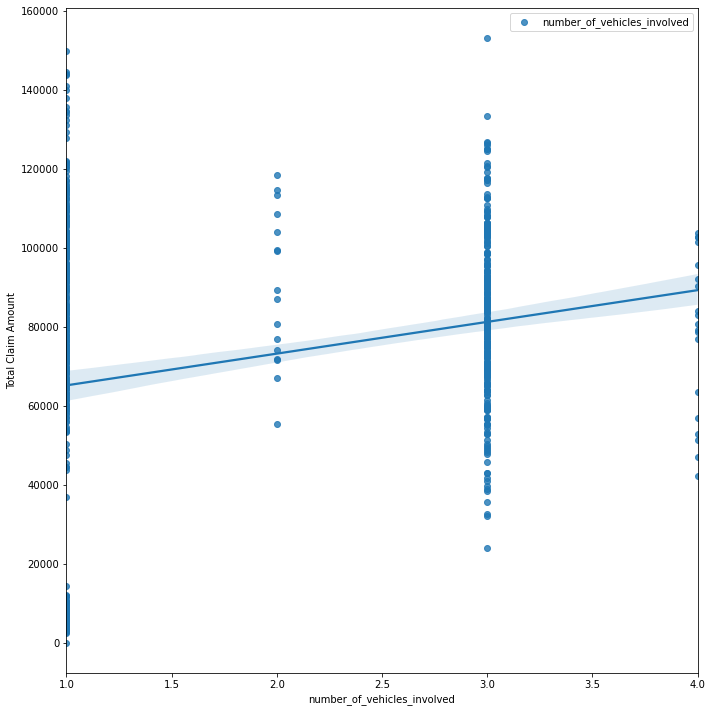

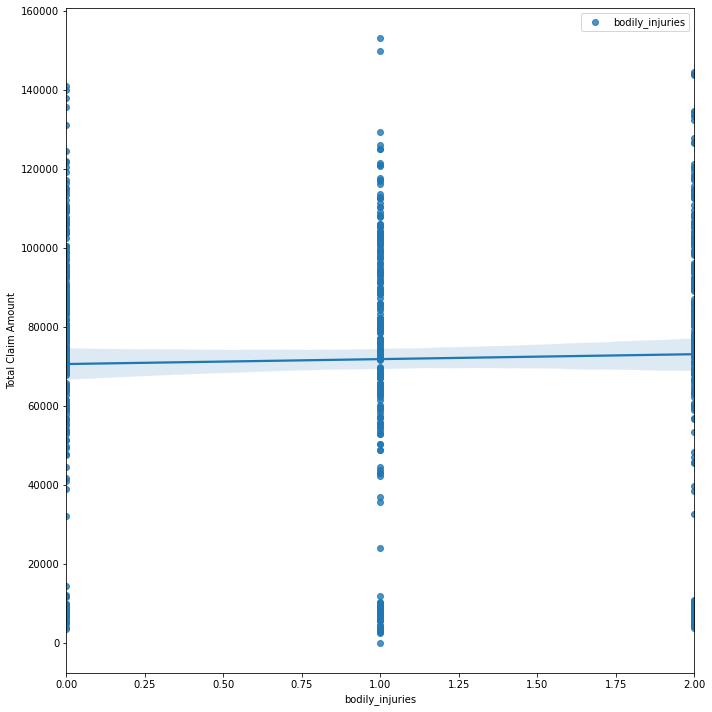

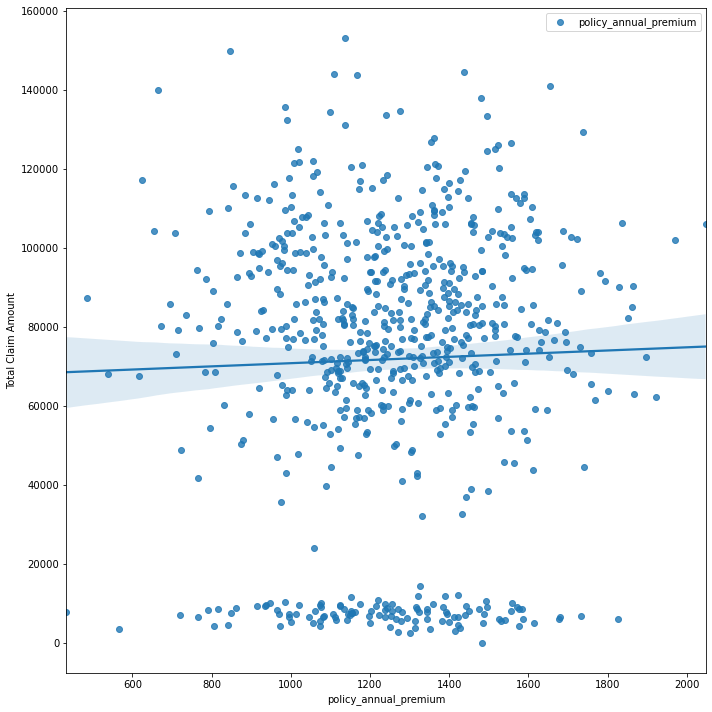

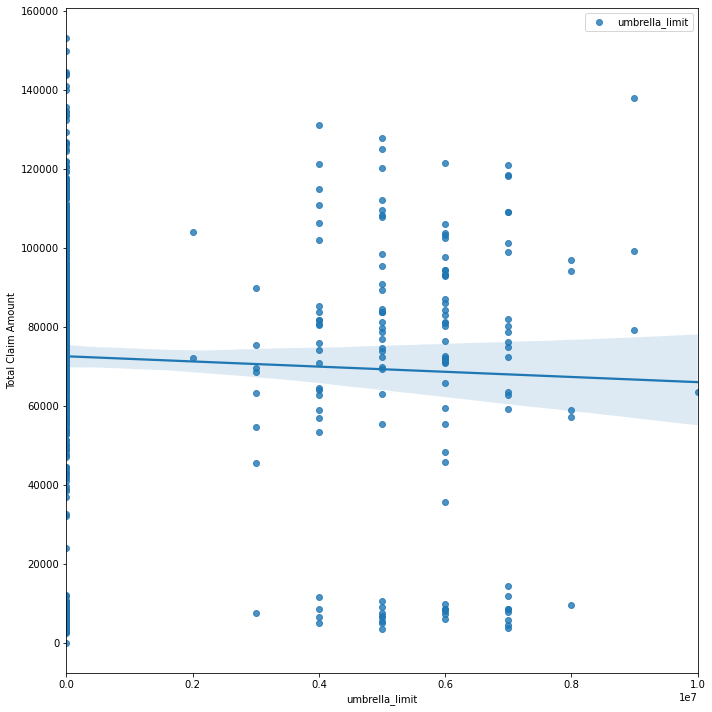

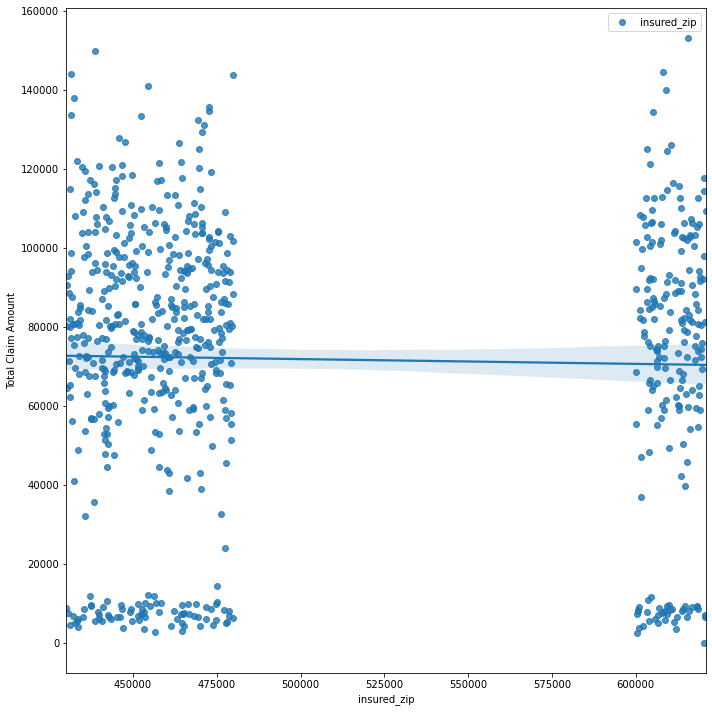

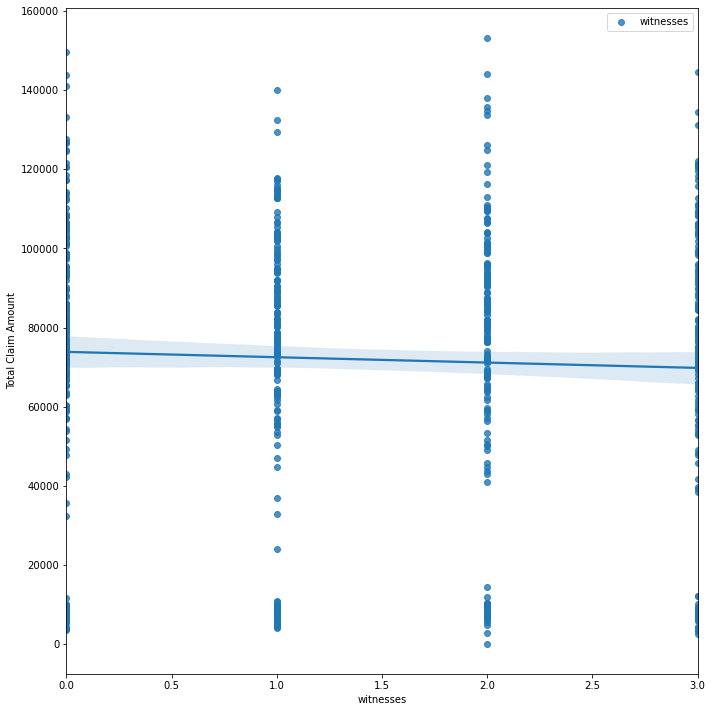

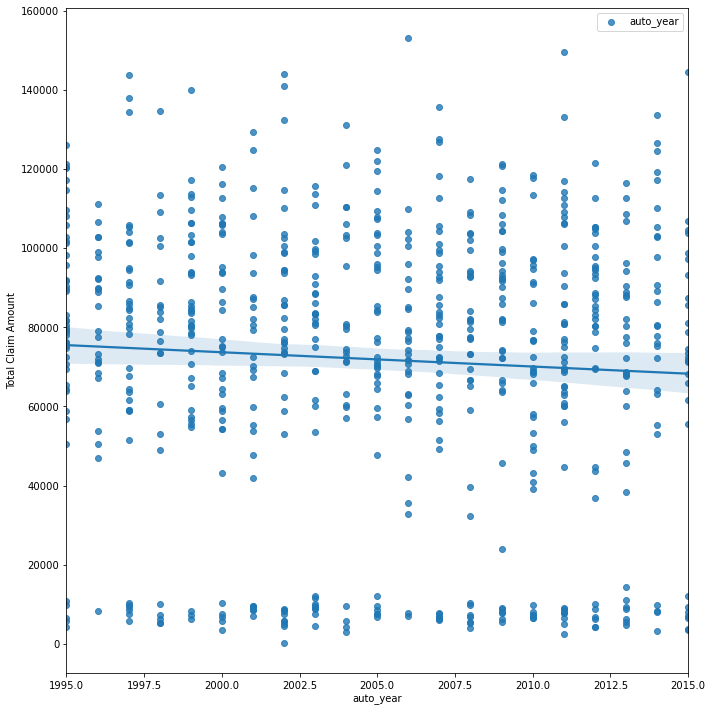

In [14]:
# to make plotting easier we will remove our target variable price from the main dataframe and save it on a separate one:
y = train_df['total_claim_amount']
X = train_df.drop(columns=['total_claim_amount'])
columns = ['months_as_customer', 'age', 'capital-gains', 'capital-loss',
       'policy_number', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
        'witnesses','auto_year']
# we use a for loop to plot our independent variables against our dependent one:
for col in columns:
    plt.figure(figsize=(10,10))
    sns.regplot(x=X[col], y=y, data=X, label=col)
    plt.ylabel('Total Claim Amount')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Data Preprocessing

* I replace the catrgorical variables with '?' with appropriate values.
* I used label encoding to transform the educational level feature
* I used catBoosterEncoder to encode features with high cardinality or too maany distinct values and pandas get_dummies for the rest of the categorical features.
* I dropped the columns I no longer need.y= train_df["total_claim_amount"]

In [15]:
cat_features = ["incident_date","incident_location","policy_bind_date", "insured_occupation", "insured_hobbies", "auto_model", "auto_make", "insured_education_level", 'insured_sex', 'insured_relationship','policy_state', 'policy_csl', 
       'property_damage', 'bodily_injuries','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available']
y = train_df['total_claim_amount']

target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc.fit_transform(train_df[cat_features], y)
train_df = train_df.join(target_enc.transform(train_df[cat_features]).add_suffix('_cb'))
test = test.join(target_enc.transform(test[cat_features]).add_suffix('_cb'))

/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [16]:
def transform_data(df):
    df.loc[df["police_report_available"]== "?","police_report_available" ]= "Don't Know"
    df.loc[df["collision_type"] == "?", "collision_type"] ="Rear Collision"
    df.loc[df["property_damage"] == "?", "property_damage"] ="Partial Damage"
      
    df.drop(["Customer_ID", "_c39", "insured_education_level", "incident_date","incident_location","policy_bind_date", "insured_occupation", "insured_hobbies", "auto_model", "auto_make", 'insured_sex', 'insured_relationship','policy_state', 'policy_csl', 
       'property_damage', 'bodily_injuries','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available'], axis=1, inplace=True)
    
    return df

In [17]:
train_df = transform_data(train_df)
train_df.head()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,policy_annual_premium,umbrella_limit,...,property_damage_cb,bodily_injuries_cb,incident_type_cb,collision_type_cb,incident_severity_cb,authorities_contacted_cb,incident_state_cb,incident_city_cb,witnesses_cb,police_report_available_cb
0,239,41,51400,-6300,743092,1000,22,1,1325.44,7000000,...,71230.290052,72150.330099,8160.361262,7972.719858,8497.835331,64283.370702,68639.745910,70698.134304,74313.297395,74130.840983
1,108,31,0,0,492224,2000,14,1,1175.70,0,...,70100.715081,72150.330099,87342.322849,82809.728064,82894.258063,84046.510444,76480.779107,75783.762653,74313.297395,69813.469575
2,116,30,0,-35500,996253,500,8,3,951.46,0,...,70100.715081,72150.330099,82187.707762,86749.913679,86071.688964,88063.413089,67785.917155,74131.551110,68811.827170,71979.885703
3,8,21,0,0,355085,500,21,1,1021.90,0,...,71230.290052,72150.330099,87342.322849,86749.913679,86071.688964,88063.413089,67785.917155,75783.762653,74685.733715,71979.885703
4,161,38,60200,0,192524,2000,0,3,1133.85,0,...,74498.832897,74621.953022,82187.707762,86749.913679,82894.258063,64283.370702,67785.917155,70250.932044,74313.297395,74130.840983


In [18]:
y= train_df["total_claim_amount"]
X= train_df.drop(["total_claim_amount"], axis=1,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [20]:
lasso_model = Lasso(alpha=0.3, normalize=True)
lasso_model.fit(X_train, y_train)

/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210493115.61138916, tolerance: 69640178.83396168
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.3, normalize=True)

In [21]:

lasso_prediction = lasso_model.predict(X_test)
lasso_prediction


array([  6627.33159628,  87232.05008083,  71193.03559057,  81539.27438388,
        88901.44365477,  78594.81943162,  12450.32644608,  74532.9687976 ,
       -18522.28524484,  84505.86439018,  96484.13033894,  84609.87549496,
        82047.57640005,  86311.86933709,  83372.07915354,  82514.6781211 ,
        75864.49378215,  85230.8061414 ,  69962.19469022,  92912.30938892,
        86904.25040915,  81150.93842245,   9171.21822444,  83284.58530165,
        21856.22890464,  85557.16400523,  73038.75564711,  84405.02378589,
        87191.65786556,   -118.50464416,  81086.11736931,  79772.18931249,
        72653.2612091 ,  94973.49451275,  85752.53454592,  76627.42889763,
        82956.58132263,  92520.06499706,  91841.36411766,  10890.2364724 ,
        90952.12300742,  86912.00599857,  92217.85901179,  82442.40399974,
        89523.57516985,  77320.61198114,  75488.4984099 ,  71959.59092874,
        91559.39619609,  83562.64366353,  72476.34080669,  87815.30751433,
        75940.11551388,  

In [22]:
randomForest_model = RandomForestRegressor()
randomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
randomForest_prediction = randomForest_model.predict(X_test)
randomForest_prediction

array([  6996.9341,  83833.1994,  78864.933 ,  86144.2664,  91258.7995,
        72651.7335,   7922.4001,  83367.9994,   6255.8669,  98440.2665,
        89763.7333,  98748.6667,  83853.8671,  80395.3337,  83248.9324,
        85463.9997,  78860.4003,  82738.4001,  73477.9998,  88644.8002,
        83390.2665,  82600.4003,   7316.1336,  81729.4666,   8345.0675,
        81480.9331,  76597.8662,  82274.933 ,  93576.6665,   7433.4673,
        75971.2002,  81097.3333,  78119.6   ,  84974.2663,  77355.8662,
        78800.9331,  85751.0662,  87914.1337,  89887.3333,   7309.2003,
        86821.7333,  83627.3327, 100121.4669,  81087.0666,  90440.8001,
        77158.2663,  80470.6673,  83448.7994,  93499.6   ,  86188.533 ,
        78813.0663,  86474.7997,  79594.7995,  96330.9329,  86098.9333,
        78843.1995,  93283.0667,   7784.8   ,  79515.9995,  83159.8664,
        90121.9997,  82875.8667,  90042.9331,  81578.2667,  87307.8667,
         7236.2673,  84850.9334,  87626.5337,  88640.7994,  8235

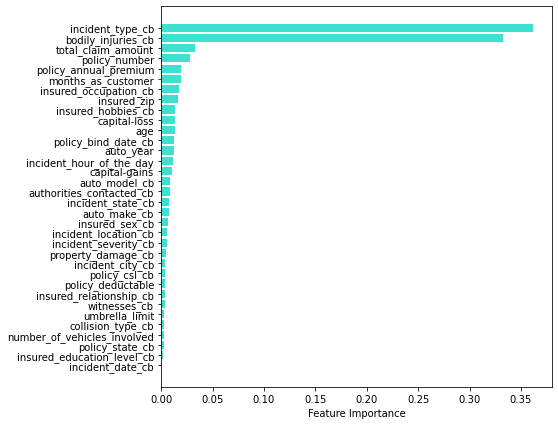

In [24]:
sorted_feature_importance = randomForest_model.feature_importances_.argsort()
plt.figure(figsize=(7,7))
plt.barh(train_df.columns[sorted_feature_importance],
randomForest_model.feature_importances_[sorted_feature_importance],color='turquoise')
plt.xlabel('Feature Importance')
plt.show()

In [25]:
xgboostmodel = XGBRegressor(use_label_encoder= False)
xgboostmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [26]:
xgboost_prediction = xgboostmodel.predict(X_test)
xgboost_prediction

/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([  8272.059 ,  81563.414 ,  80671.33  ,  82562.75  ,  93210.734 ,
        84820.34  ,   1153.2283,  89997.1   ,   7171.74  ,  99395.516 ,
        96648.88  , 100774.17  ,  88894.65  ,  91464.26  ,  79351.53  ,
        88195.305 ,  80867.984 ,  83524.12  ,  85532.27  ,  85567.266 ,
        91714.766 ,  92062.72  ,   4100.5415,  91967.23  ,  12153.1045,
        76781.67  ,  71453.516 ,  73037.445 ,  89356.58  ,   4817.0337,
        81777.89  ,  81566.945 ,  84403.99  ,  91366.32  ,  63653.957 ,
        77158.81  ,  76288.05  ,  84548.87  ,  84614.85  ,  15203.249 ,
        84554.766 ,  98025.62  , 117615.1   ,  67476.516 ,  85906.07  ,
        75666.055 ,  78772.05  ,  78325.484 ,  88397.34  ,  79495.34  ,
        82108.92  ,  69933.95  ,  69207.734 ,  87717.41  ,  92284.72  ,
       105700.82  , 120038.08  ,   9103.646 ,  78109.74  ,  72476.77  ,
        95222.016 ,  90773.1   ,  93160.195 ,  98653.016 ,  75026.266 ,
        13090.966 , 102638.61  ,  87339.03  ,  85816.125 ,  7737

In [27]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)
pred

array([  5165.67042032,  87518.72737081,  71654.00409732,  83206.07941755,
        89688.83509085,  78681.46227599,  13738.64022875,  74484.88229444,
       -19818.43797896,  83030.54006113,  95716.02441553,  82958.48468279,
        80644.0340104 ,  85613.04459805,  83369.29892701,  81003.72569425,
        75953.46240174,  84165.65978848,  69915.02603148,  91950.62850235,
        87227.09685607,  80252.89821387,  13345.40885481,  82381.54735264,
        26824.81074299,  84512.72676523,  73190.37549428,  84901.89057745,
        85364.87455306,   4670.16879451,  81769.61523312,  79738.24460626,
        73470.48656732,  94062.00112356,  84645.56121744,  76738.8438699 ,
        81753.22141282,  92397.04453575,  90267.59356208,  11509.78811492,
        91368.11280668,  84863.76381424,  92518.17701757,  81695.80714427,
        89744.35974363,  78507.73501734,  74109.12017608,  72171.85711009,
        90249.64884468,  84311.97196777,  71587.16810742,  86914.27862237,
        77364.12146213,  

#### Model Evaluation



In [28]:
models = [LinearRegression(), RandomForestRegressor(random_state=0, n_estimators=100), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None), KNeighborsRegressor(),SVR(), Ridge(alpha=0.05, normalize=True), Lasso(alpha=0.3, normalize=True)]

In [29]:
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,predictions )
    print(type(model).__name__, metrics.mean_absolute_error(y_test, predictions), "       Root mean squared error", np.sqrt(MSE))

LinearRegression 14811.078661136298        Root mean squared error 19003.81936790384
RandomForestRegressor 14162.874600000001        Root mean squared error 18907.913011858353
XGBRegressor 15557.951256243026        Root mean squared error 20191.094829363974
KNeighborsRegressor 18190.895600000003        Root mean squared error 24351.13292593102
SVR 24425.710315145076        Root mean squared error 32938.15543472814
Ridge 14825.350833405848        Root mean squared error 19143.667793779878
Lasso 14815.369833778977        Root mean squared error 19006.99199292348


/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210493115.61138916, tolerance: 69640178.83396168
  model = cd_fast.enet_coordinate_descent(


#### Work on the test data

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  300 non-null    object 
 1   months_as_customer           300 non-null    int64  
 2   age                          300 non-null    int64  
 3   insured_sex                  300 non-null    object 
 4   insured_education_level      300 non-null    object 
 5   insured_occupation           300 non-null    object 
 6   insured_hobbies              300 non-null    object 
 7   insured_relationship         300 non-null    object 
 8   capital-gains                300 non-null    int64  
 9   capital-loss                 300 non-null    int64  
 10  policy_number                300 non-null    int64  
 11  policy_bind_date             300 non-null    object 
 12  policy_state                 300 non-null    object 
 13  policy_csl          

In [31]:
test = transform_data(test)
test.head()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,policy_annual_premium,umbrella_limit,...,property_damage_cb,bodily_injuries_cb,incident_type_cb,collision_type_cb,incident_severity_cb,authorities_contacted_cb,incident_state_cb,incident_city_cb,witnesses_cb,police_report_available_cb
0,5,26,31500,0,924318,2000,22,1,1137.02,0,...,74498.832897,68880.377428,87342.322849,82809.728064,82894.258063,80156.505131,67785.917155,70250.932044,68811.827170,71979.885703
1,160,33,61600,0,180286,1000,17,3,1422.78,0,...,71230.290052,74621.953022,82187.707762,86749.913679,82894.258063,80156.505131,68639.745910,74131.551110,68811.827170,74130.840983
2,385,51,0,-61000,178081,1000,14,3,976.37,0,...,71230.290052,68880.377428,82187.707762,82809.728064,65821.128286,88063.413089,67785.917155,74131.551110,68811.827170,71979.885703
3,446,57,42700,-64900,991480,2000,10,3,1373.21,0,...,70100.715081,72150.330099,82187.707762,86749.913679,82894.258063,64283.370702,73782.560259,67990.432221,74685.733715,69813.469575
4,84,29,0,-29900,630998,1000,6,1,1117.17,0,...,74498.832897,74621.953022,8160.361262,7972.719858,8497.835331,64283.370702,73782.560259,70698.134304,74685.733715,74130.840983


In [32]:
# test.profile_report()

In [33]:
# for model in models:
#     model.fit(X_train, y_train)
#     predictions = model.predict(test)
#     print(type(model).__name__, predictions)

predictions = randomForest_model.predict(test)
predictions

array([ 80016.1334,  71817.1991,  74574.    ,  91922.5339,   8405.7335,
        95107.5996,  85565.8662,  73801.9999,  82304.2664,   7969.2006,
         6904.4002,  88048.8001,   7595.4668,  79706.9333,  84053.4666,
         7505.4668,  83461.733 ,  81555.5995,  84736.2673,  83497.7332,
        87250.7996,   7810.1336,  80656.1334,   8289.3329,   7182.2665,
        90921.467 ,  77757.4661,  75435.333 ,  86174.2663,  80820.9334,
        77218.6668,  89580.5332,  90676.1333,  86828.6672,  94708.7998,
        86229.2   ,  75568.2667,   6613.6003,  86936.6665,  92222.5332,
        85536.2666,  92824.5331,  90316.4   ,  87600.4   ,  86461.1998,
        91887.2002,  85581.5997,  85153.9996,   8046.2677,   7904.8007,
        77726.2668,  84977.333 ,  79755.0659,  89065.2001,  79043.3333,
        85516.7994,  81302.9327,  93951.7331,  83149.7333,   6795.8671,
        89869.3336,   7987.4668,  77408.9328,   7909.5999,  75626.6664,
         6927.4668,  88863.0661,  94550.2665,  73135.1999,  7794

In [34]:
lasso_prediction = lasso_model.predict(test)
lasso_prediction

array([ 83827.4713744 ,  84020.48057145,  76603.48791668,  86918.50322569,
        19452.7762866 ,  89508.82263793,  80734.75960228,  76139.33660762,
        85822.21863807,  10141.70662458,  12168.41632547,  87496.39104323,
         7883.39149154,  86679.63525546,  85969.55886887,  12816.20406338,
        79567.75973767,  83379.0623934 ,  82426.73340515,  77026.50063141,
        78162.14637431,   4398.17168288,  81041.83185926,  13190.74181384,
         6612.98796134,  89455.58616785,  75171.96663447,  79721.18849052,
        83402.56493885,  87211.71572757,  89043.53455834,  87302.06964738,
        89367.55949245,  87264.38507352,  91025.38835405,  92021.72955096,
        79141.98663903,   5381.50758944,  91837.63594351,  82091.65062314,
        86055.30547135,  87180.7601236 ,  90113.76333877,  84607.2755078 ,
        83805.91082793,  81748.59569347,  84574.38356491,  93850.63880087,
        17653.74826763,   5028.93310849,  69031.98036173,  85456.22061653,
        81230.76899459,  

In [35]:

submission_df["total_claim_amount"] = lasso_prediction
submission_df.to_csv("submission.csv", index=False)
submission_df.head()

,Customer_ID,total_claim_amount
0,Customer_521,83827.471374
1,Customer_737,84020.480571
2,Customer_740,76603.487917
3,Customer_660,86918.503226
4,Customer_411,19452.776287


In [36]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [37]:
#importing library and building model
model=CatBoostRegressor(iterations=30, depth=3, learning_rate=0.1, random_state=0, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True, use_best_model=True)
plt.show()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 32976.6533125	test: 31485.5768269	best: 31485.5768269 (0)	total: 52.6ms	remaining: 1.53s
1:	learn: 31065.1139855	test: 29825.2066544	best: 29825.2066544 (1)	total: 54.3ms	remaining: 760ms
2:	learn: 29318.1957455	test: 28310.0882067	best: 28310.0882067 (2)	total: 56.3ms	remaining: 507ms
3:	learn: 27861.8992840	test: 27081.3940148	best: 27081.3940148 (3)	total: 57.7ms	remaining: 375ms
4:	learn: 26538.2404397	test: 25933.5056846	best: 25933.5056846 (4)	total: 59.2ms	remaining: 296ms
5:	learn: 25403.8096034	test: 24940.2934298	best: 24940.2934298 (5)	total: 60.6ms	remaining: 242ms
6:	learn: 24444.5943736	test: 24104.6397760	best: 24104.6397760 (6)	total: 61.9ms	remaining: 203ms
7:	learn: 23645.6198735	test: 23397.9196383	best: 23397.9196383 (7)	total: 63.2ms	remaining: 174ms
8:	learn: 22956.3126074	test: 22784.5886676	best: 22784.5886676 (8)	total: 64.7ms	remaining: 151ms
9:	learn: 22369.2540469	test: 22262.2668475	best: 22262.2668475 (9)	total: 66.1ms	remaining: 132ms
10:	learn:

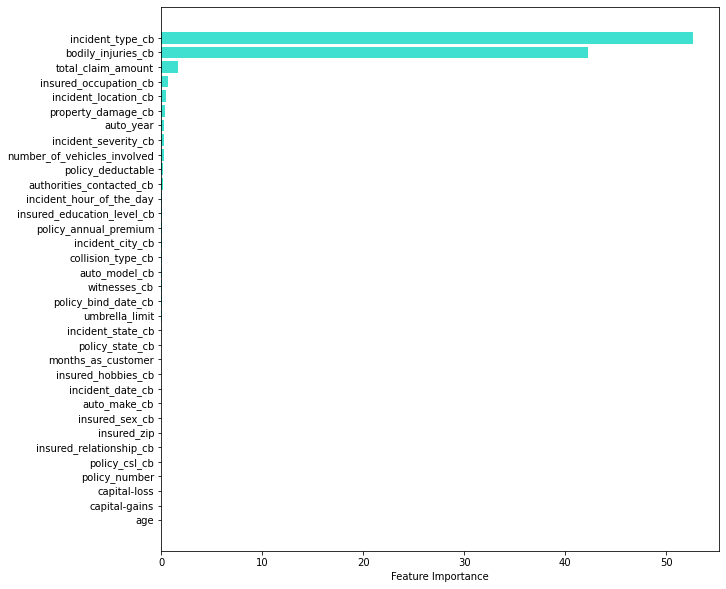

In [38]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(train_df.columns[sorted_feature_importance],
model.feature_importances_[sorted_feature_importance],color='turquoise')
plt.xlabel('Feature Importance')
plt.show()

In [39]:
cat_prediction = model.predict(test)
cat_prediction

array([81612.13506606, 81891.34582641, 78219.20626626, 85691.07352944,
       10751.01736727, 82711.68783363, 80746.63104912, 80387.75951796,
       83271.44464602, 11769.20008383, 13104.50009437, 84834.56541452,
       11390.64638584, 82442.23886258, 86947.81532943, 12613.34982383,
       79443.94205777, 80829.32575883, 81394.61363627, 81970.26038275,
       81503.25319289, 10921.72755353, 80253.08082964, 13723.72447888,
       12588.55216608, 84096.78263115, 80833.969627  , 84482.09293062,
       82569.01224673, 83069.20410387, 81576.35675485, 85782.24905289,
       84461.27435333, 85824.79072624, 85442.28500443, 84383.04428627,
       82730.37854846, 10886.41606989, 85815.93828534, 83367.5739156 ,
       84414.14127655, 86385.41147934, 87709.97681006, 85988.44539395,
       83373.40341086, 87378.49518927, 85747.52088578, 83710.1045183 ,
       12190.24588453, 10895.95210566, 81081.69020435, 83997.66167923,
       80823.49201673, 81435.70109407, 85171.06457931, 80186.36732116,
      

In [40]:
submission_df["total_claim_amount"] = cat_prediction
submission_df.to_csv("submission.csv", index=False)
submission_df.head()

,Customer_ID,total_claim_amount
0,Customer_521,81612.135066
1,Customer_737,81891.345826
2,Customer_740,78219.206266
3,Customer_660,85691.073529
4,Customer_411,10751.017367
